In [ ]:
import pandas as pd
import numpy as np

The topic for this project is examing the contributing factors behind hit and runs. I want to make a model that predicts whether or not a given crash will be a hit and run, then use that model to see what factors were most useful to it for predicting a hit and run.

The data comes from the city of chicago, which provides up-to-date data on crash reports they have in the city. A description of each feature is also given there on the website.

In [ ]:
df = pd.read_csv("ChicagoCrashData1.csv")


Part 1: EDA and Cleaning

In [ ]:
df.columns

Index(['CRASH_RECORD_ID', 'CRASH_DATE_EST_I', 'CRASH_DATE',
       'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION',
       'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE',
       'TRAFFICWAY_TYPE', 'LANE_CNT', 'ALIGNMENT', 'ROADWAY_SURFACE_COND',
       'ROAD_DEFECT', 'REPORT_TYPE', 'CRASH_TYPE', 'INTERSECTION_RELATED_I',
       'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'DAMAGE', 'DATE_POLICE_NOTIFIED',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO',
       'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE',
       'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I',
       'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'NUM_UNITS',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
       'INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH',
       'LATITUDE', 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 794956 entries, 0 to 794955
Data columns (total 48 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                794956 non-null  object 
 1   CRASH_DATE_EST_I               59606 non-null   object 
 2   CRASH_DATE                     794956 non-null  object 
 3   POSTED_SPEED_LIMIT             794956 non-null  int64  
 4   TRAFFIC_CONTROL_DEVICE         794956 non-null  object 
 5   DEVICE_CONDITION               794956 non-null  object 
 6   WEATHER_CONDITION              794956 non-null  object 
 7   LIGHTING_CONDITION             794956 non-null  object 
 8   FIRST_CRASH_TYPE               794956 non-null  object 
 9   TRAFFICWAY_TYPE                794956 non-null  object 
 10  LANE_CNT                       199006 non-null  float64
 11  ALIGNMENT                      794956 non-null  object 
 12  ROADWAY_SURFACE_COND          

In [ ]:
#A lot of redundant columns: especially for date.
#Drop CRASH_DATE, CRASH_DATE_EST_I, DATE_POLICE_NOTIFIED
df = df.drop(columns=['CRASH_DATE', 'CRASH_DATE_EST_I', 'DATE_POLICE_NOTIFIED'])


In [ ]:
df.INJURIES_UNKNOWN.value_counts()
#Useless columns, we'll drop it.
df = df.drop(columns=['INJURIES_UNKNOWN'])

In [ ]:
df.MOST_SEVERE_INJURY.value_counts()


,count
MOST_SEVERE_INJURY,
NO INDICATION OF INJURY,118007
NONINCAPACITATING INJURY,10766
"REPORTED, NOT EVIDENT",6046
INCAPACITATING INJURY,2312
FATAL,202


In [ ]:
#Encode to numeric
injury_encoding = {
    "NO INDICATION OF INJURY": 0,
    "REPORTED, NOT EVIDENT": 1,
    "NONINCAPACITATING INJURY": 2,
    "INCAPACITATING INJURY": 3,
    "FATAL": 4
}

df["MOST_SEVERE_INJURY"] = df["MOST_SEVERE_INJURY"].map(injury_encoding)




In [ ]:
#Dropping a lot of columns because there isn't enough data with them or they aren't super useful.
df = df.drop(columns=['LATITUDE', 'LONGITUDE','LANE_CNT','REPORT_TYPE','ALIGNMENT','LOCATION','FIRST_CRASH_TYPE','TRAFFICWAY_TYPE','ROADWAY_SURFACE_COND','TRAFFIC_CONTROL_DEVICE','DEVICE_CONDITION','INTERSECTION_RELATED_I','CRASH_TYPE','NOT_RIGHT_OF_WAY_I','STREET_NO','STREET_DIRECTION','STREET_NAME','PHOTOS_TAKEN_I','WORK_ZONE_I','WORK_ZONE_TYPE','WORKERS_PRESENT_I','SEC_CONTRIBUTORY_CAUSE','BEAT_OF_OCCURRENCE','STATEMENTS_TAKEN_I','DOORING_I'])


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 794956 entries, 0 to 794955
Data columns (total 19 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                794956 non-null  object 
 1   POSTED_SPEED_LIMIT             794956 non-null  int64  
 2   WEATHER_CONDITION              794956 non-null  object 
 3   LIGHTING_CONDITION             794956 non-null  object 
 4   ROAD_DEFECT                    794956 non-null  object 
 5   HIT_AND_RUN_I                  794956 non-null  object 
 6   DAMAGE                         794956 non-null  object 
 7   PRIM_CONTRIBUTORY_CAUSE        794956 non-null  object 
 8   NUM_UNITS                      794956 non-null  int64  
 9   MOST_SEVERE_INJURY             793204 non-null  float64
 10  INJURIES_TOTAL                 793215 non-null  float64
 11  INJURIES_FATAL                 793215 non-null  float64
 12  INJURIES_INCAPACITATING       

In [ ]:
df.DAMAGE.value_counts()

,count
DAMAGE,
"OVER $1,500",87033
"$501 - $1,500",35337
$500 OR LESS,15413


In [ ]:
#Encode to numeric
damage_encoding = {
    "$500 OR LESS": 0,
    "$501 - $1,500": 1,
    "OVER $1,500": 2,
}

df["DAMAGE"] = df["DAMAGE"].map(damage_encoding)



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137784 entries, 0 to 137783
Data columns (total 19 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                137784 non-null  object 
 1   POSTED_SPEED_LIMIT             137784 non-null  int64  
 2   WEATHER_CONDITION              137784 non-null  object 
 3   LIGHTING_CONDITION             137784 non-null  object 
 4   ROAD_DEFECT                    137784 non-null  object 
 5   HIT_AND_RUN_I                  137783 non-null  object 
 6   DAMAGE                         137783 non-null  float64
 7   PRIM_CONTRIBUTORY_CAUSE        137783 non-null  object 
 8   NUM_UNITS                      137783 non-null  float64
 9   MOST_SEVERE_INJURY             137333 non-null  float64
 10  INJURIES_TOTAL                 137338 non-null  float64
 11  INJURIES_FATAL                 137338 non-null  float64
 12  INJURIES_INCAPACITATING       

In [ ]:

df.isnull().sum()

,0
CRASH_RECORD_ID,0
POSTED_SPEED_LIMIT,0
WEATHER_CONDITION,0
LIGHTING_CONDITION,0
ROAD_DEFECT,0
HIT_AND_RUN_I,1
DAMAGE,1
PRIM_CONTRIBUTORY_CAUSE,1
NUM_UNITS,1
MOST_SEVERE_INJURY,451


In [ ]:
#Drop rows with nulls in them since there are so few
df = df.dropna(subset=['MOST_SEVERE_INJURY'])

In [ ]:
df.isnull().sum()

,0
CRASH_RECORD_ID,0
POSTED_SPEED_LIMIT,0
WEATHER_CONDITION,0
LIGHTING_CONDITION,0
ROAD_DEFECT,0
HIT_AND_RUN_I,0
DAMAGE,0
PRIM_CONTRIBUTORY_CAUSE,0
NUM_UNITS,0
MOST_SEVERE_INJURY,0


In [ ]:
#Check for duplicates
df.duplicated().sum()

np.int64(0)

Part 2: Setting up and running the model.

In [ ]:
#Do get dummies on WEATHER_CONDITION with prefix WTHR and make it int intead of boolean
df = pd.get_dummies(df, columns=['WEATHER_CONDITION'], prefix='WTHR', dtype=int)

In [ ]:
#Do get dummies on LIGHTING_CONDITION with prefix LIGHT and make it int intead of boolean
df = pd.get_dummies(df, columns=['LIGHTING_CONDITION'], prefix='LIGHT', dtype=int)

In [ ]:
#Do get dummies on ROAD_DEFECT with prefix DFCT and make it int intead of boolean
df = pd.get_dummies(df, columns=['ROAD_DEFECT'], prefix='DFCT', dtype=int)


In [ ]:
#MAP HIT_AND_RUN_I from Y to 1 and N to 0
df['HIT_AND_RUN_I'] = df['HIT_AND_RUN_I'].map({'Y': 1, 'N': 0})


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

features = df[numeric_cols.drop('HIT_AND_RUN_I')]

target = df['HIT_AND_RUN_I']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier

#Run grid search for best hyperparameters
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs'],
    'penalty': ['l2'],
    'max_iter': [1000]
}

log_reg = LogisticRegression()


grid_search = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

best_log_reg = grid_search.best_estimator_


print("Best Hyperparameters:", grid_search.best_params_)

# Get best one
ensemble = VotingClassifier(estimators=[('logreg', best_log_reg)], voting='soft')
ensemble.fit(X_train, y_train)

# get accuracy
y_pred = ensemble.predict(X_test)
print("Ensemble Accuracy:", accuracy_score(y_test, y_pred))



Best Hyperparameters: {'C': 0.01, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'liblinear'}
Ensemble Accuracy: 0.7154767539228892


Part 3: Post-model analysis.

In [ ]:
model = LogisticRegression(max_iter=1000,C=0.01,penalty="l2",solver="liblinear")
model.fit(X_train, y_train)
#Get the model afterwards so I can take top features of it.

LogisticRegression(C=0.01, max_iter=1000, solver='liblinear')

In [ ]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy Score: {accuracy:.4f}")

Accuracy Score: 0.7155


In [ ]:
import numpy as np
import pandas as pd
#Checking which features are the most important for predicting hit and runs.

feature_names = X_train.columns
coefficients = model.coef_[0]

coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'AbsCoefficient': np.abs(coefficients)
})

coef_df_sorted = coef_df.sort_values(by='AbsCoefficient', ascending=False)

print(coef_df_sorted[['Feature', 'Coefficient']])
#It appears that LIGHTING is the biggest factor, followed by road defect. The rest seem to be relatively unimportant.

                          Feature  Coefficient
25                 LIGHT_DARKNESS     1.138824
28                 LIGHT_DAYLIGHT    -0.742176
34                DFCT_RUT, HOLES    -0.471258
2                       NUM_UNITS     0.467600
29                     LIGHT_DUSK    -0.407782
27                     LIGHT_DAWN    -0.390547
9          INJURIES_NO_INDICATION    -0.355615
4                  INJURIES_TOTAL    -0.304487
30                  LIGHT_UNKNOWN     0.302360
24                   WTHR_UNKNOWN     0.213786
26   LIGHT_DARKNESS, LIGHTED ROAD    -0.196693
19                     WTHR_OTHER    -0.192011
32                DFCT_NO DEFECTS     0.187172
33                     DFCT_OTHER    -0.166693
23                      WTHR_SNOW    -0.159185
36                   DFCT_UNKNOWN     0.152748
3              MOST_SEVERE_INJURY    -0.101430
8   INJURIES_REPORTED_NOT_EVIDENT    -0.100356
6         INJURIES_INCAPACITATING    -0.097410
31         DFCT_DEBRIS ON ROADWAY    -0.096949
7     INJURIE

<Figure size 1000x600 with 0 Axes>

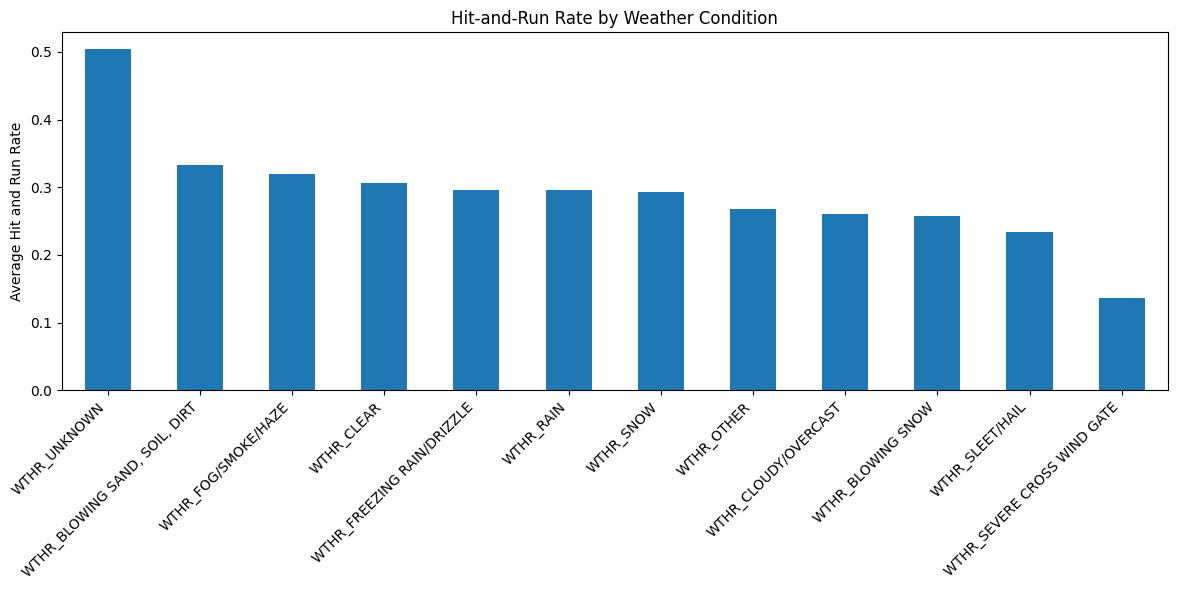

In [ ]:
import matplotlib.pyplot as plt
#Comparing hit and run rate by weather type.

weather_cols = [col for col in df.columns if col.startswith('WTHR_')]


hit_and_run_means = {
    col: df.loc[df[col] == 1, 'HIT_AND_RUN_I'].mean()
    for col in weather_cols
}


weather_df = pd.DataFrame.from_dict(hit_and_run_means, orient='index', columns=['HitAndRunRate'])
weather_df = weather_df.sort_values(by='HitAndRunRate', ascending=False)


plt.figure(figsize=(10, 6))
weather_df.plot(kind='bar', legend=False, figsize=(12, 6))
plt.ylabel("Average HIT_AND_RUN_I")
plt.ylabel("Average Hit and Run Rate")
plt.title("Hit-and-Run Rate by Weather Condition")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


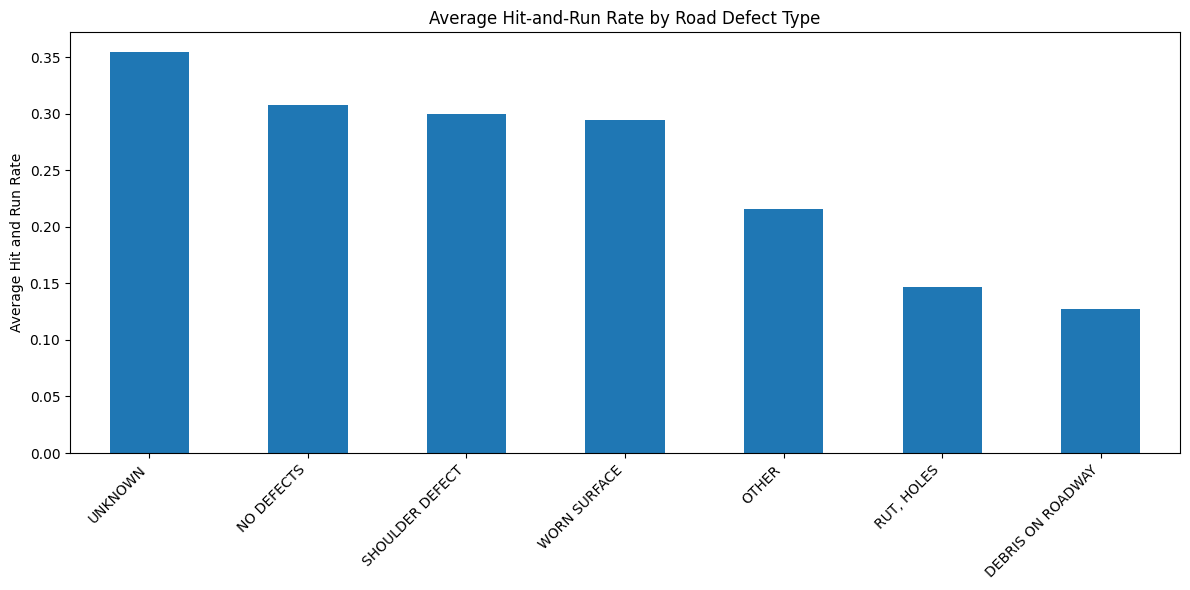

In [ ]:
import matplotlib.pyplot as plt

#Now checking hit and run rate among defect columns
defect_cols = [col for col in df.columns if col.startswith('DFCT_')]


defect_hit_and_run_means = {
    col: df.loc[df[col] == 1, 'HIT_AND_RUN_I'].mean()
    for col in defect_cols
}

defect_df = (
    pd.DataFrame.from_dict(defect_hit_and_run_means, orient='index', columns=['HitAndRunRate'])
      .sort_values(by='HitAndRunRate', ascending=False)
)

defect_df.index = defect_df.index.str.replace('DFCT_', '', regex=False)

plt.figure(figsize=(12, 6))
defect_df['HitAndRunRate'].plot(kind='bar', legend=False)
plt.ylabel("Average Hit and Run Rate")
plt.title("Average Hit-and-Run Rate by Road Defect Type")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


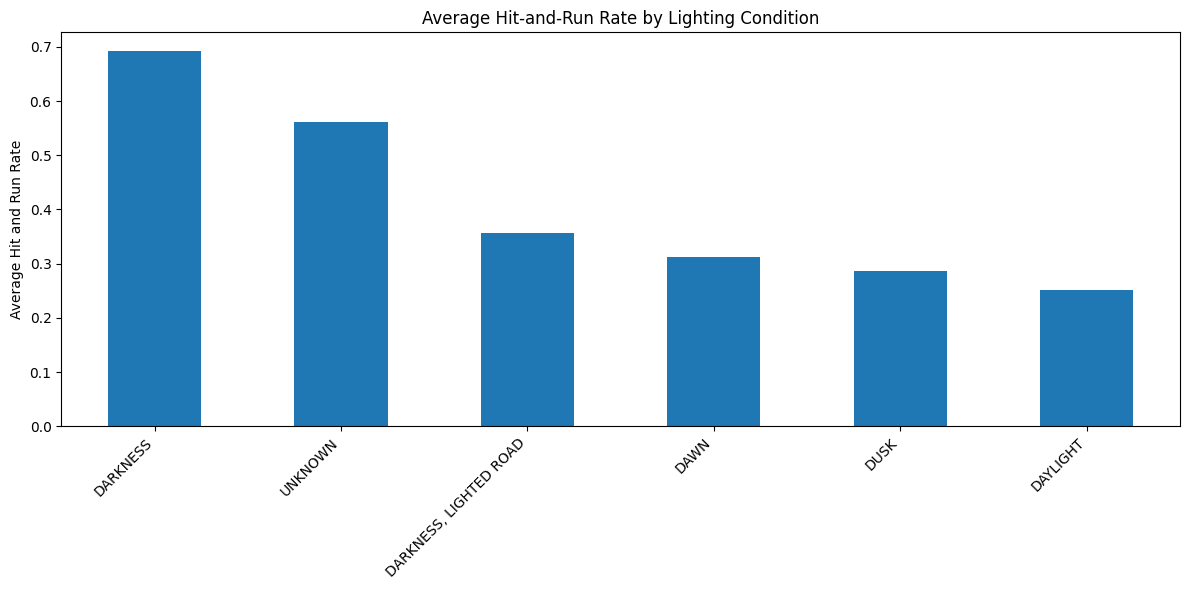

In [ ]:
import matplotlib.pyplot as plt

# Now checking hit and run rate by lighting type.
light_cols = [col for col in df.columns if col.startswith('LIGHT_')]

light_hit_and_run_means = {
    col: df.loc[df[col] == 1, 'HIT_AND_RUN_I'].mean()
    for col in light_cols
}

light_df = (
    pd.DataFrame.from_dict(light_hit_and_run_means, orient='index', columns=['HitAndRunRate'])
      .sort_values(by='HitAndRunRate', ascending=False)
)


light_df.index = light_df.index.str.replace('LIGHT_', '', regex=False)


plt.figure(figsize=(12, 6))
light_df['HitAndRunRate'].plot(kind='bar', legend=False)
plt.ylabel("Average Hit and Run Rate")
plt.title("Average Hit-and-Run Rate by Lighting Condition")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Based on our data the main factors that contribute to hit and runs are the darkness on the road and if there are any obstructions directly on the road that would prevent a driver from fleeing the scene of an accident. Also, since our accuracy score is relatively low, it implies that the features contained in the dataset don't fully explain why hit and runs happen and there is something else going on.